<a href="https://colab.research.google.com/github/Datasci266-Final-Project/Job-Listings/blob/main/EDA%20and%20Processing%20Notebooks/EDA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q transformers

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from pprint import pprint
import csv
import json
import re

In [ ]:
# from transformers import BertTokenizer, TFBertModel

In [ ]:
import pandas as pd #only for eda
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',400)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lux_data = pd.read_csv(r'/content/drive/MyDrive/lu_data_job_titles.csv',header=None)

In [ ]:
us_data = pd.read_csv(r'/content/drive/MyDrive/sample_data_job_titles.csv',header=None)

In [ ]:
lux_data.head()

,0,1,2,3
0,(Senior) IT SharePoint Business Analyst,"The EIB, the European Union's bank, is seeking to recruit for its Directorate – Corporate Services, Transversal Services Department – Digital Solutions Division - Collaboration & Intranet Systems Unit at its headquarters in Luxembourg, a (Senior) IT SharePoint Business Analyst*. This is a full time position at grade 5/6. Panel interviews are anticipated for end of August The term of this contr...",SENIOR,NaN
1,Senior Internal Auditor,"The incumbent is responsible to the NSPA Auditor General, for performing a wide range of auditing functions, including taking the lead for specific audit tasks. POST DETAILS Duty travel expected, in accordance with NATO policy, in support of NAC-approved operations and missions, on a case-by-case basis, by traveling to theatre/mission locations, especially where Agency personnel are/will be se...",SENIOR,NaN
2,Fund Accounting Manager: develop the Luxembourgish entity,"We are very glad to let you know about the new job opportunity at one of our partners! This service provider has recently been created abroad and arrived in Luxembourg a few months ago. Today they are hiring a Fund Accounting Manager. You will not have many chances to help develop an entity here, in Luxembourg, proving your skills both in accounting and in management. Our partner is looking fo...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '75000', 'unitText': 'YEAR'}}"
3,Compliance Supervisor,"Austin Bright est actuellement à la recherche, pour l'un de ses partenaires, un responsable de la conformité (Compliance Supervisor) afin de renforcer son département compliance. Au sein d'un fournisseur de services financiers, vous prendrez en charge une équipe d'une demi-douzaine de juniors et seniors. Cette position vous offre une large autonomie car, grâce à une ligne hiérarchique directe,...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '85000', 'unitText': 'YEAR'}}"
4,Accountant ǀ FR/EN/ESP ǀ Luxembourg train station,"Dynamic. Digitalized. Meritocratic. These are some of the many advantages that this fiduciary has to offer for you. As Medior/Senior Accountant, you will join a team of 6 people that have all gotten the opportunity to develop a real expertise and all have something to teach you, no matter their experience level. Established more than 5 years ago, this structure has specialized in the accountan...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '3500', 'unitText': 'MONTH'}}"


In [ ]:
us_data.head()

,0,1,2,3
0,Concessions Stand Lead - Alpine Valley Music Theatre,"In order to be considered for this role, after clicking 'apply now' above and being redirected, you must fully complete the application process on the follow-up screen. The Role The Concessions Stand Lead is responsible for the complete operation of assigned concession stands. Trains personnel, supervises and directs the work activities of others. All Concessions Stand Leads report directly to...",LEAD,NaN
1,Junior Auditor,"What we offerExcellent health benefits plan, which includes day 1 eligibility for medical, vision and dental options401(k) with company matchCompany profit sharing planGenerous paid time off packagePaid parental leaveCompany-paid mental health benefit through Headspace2 free on-site fitness roomsEmployee Assistance ProgramEmployee Resource GroupsPersonal and professional development programJob...",JUNIOR,NaN
2,CFO,"CFO Opportunity with Higher Education Institution This Jobot Job is hosted by: Austin Younglove Are you a fit? Easy Apply now by clicking the ""Apply"" button and sending us your resume. Salary: $125,000 - $200,000 per year A bit about us: Our Mission is to provide quality undergraduate, graduate, certificate, and continuing education to our local and global community. We offer higher education ...",CHIEF,NaN
3,Senior Accountant,"Seeking an Experienced, Enthusiastic, Multi-talented Accountant, to fill a Full Time position in our Growing St. Clair Shores Company. We're looking for applicants with the following experience: Audited Financials Payroll Accounts Payables General Ledger Reconciliations Month End Closing Quarter-end and Year-end Tax filings Customer Service Experience The successful candidate will possess the ...",SENIOR,NaN
4,Operations Accounting Site Lead,"There are over 7 billion people on this planet. And by 2050, there will be 2 billion more... many moving into urban centers at an unprecedented rate. Making sure there is enough food, fiber and infrastructure for our rapidly growing world is what we're all about at John Deere. And it's why we're investing in our people and our technology like never before! Here the world's brightest minds are ...",LEAD,NaN


In [ ]:
combined_df = pd.concat([us_data,lux_data], axis=0)

In [ ]:
column_names = ['title','text','level','salary']
combined_df.columns=column_names

In [ ]:
print(combined_df.level.value_counts().head(30))
len(combined_df)

SENIOR                                                               14017
Premier emploi                                                       13000
Confirmé                                                             11663
Manager                                                               7497
JUNIOR                                                                6548
60 months of experience                                               3089
36 months of experience                                               2954
Non pertinent                                                         2523
Stagiaire                                                             2161
[@type:OccupationalExperienceRequirements, monthsOfExperience:36]     1972
24 months of experience                                               1905
[@type:OccupationalExperienceRequirements, monthsOfExperience:60]     1792
Bachelors Degree                                                      1409
FULL_TIME                

113540

In [ ]:
print(combined_df.salary[100821])
len(combined_df)
print(combined_df.describe())

{'currency': 'EUR', 'value': {'unitText': 'YEAR', 'minValue': 65000, 'maxValue': 65000, '@type': 'QuantitativeValue'}, '@type': 'MonetaryAmount'}
                    title  \
count              113540   
unique              59232   
top     Senior Accountant   
freq                  352   

                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
count                                                                                                                                                                                                                                                                                                    

In [ ]:
# combined_df[combined_df.notnull().all(axis=1)].salary.head(20).apply(lambda x: json.loads(x.replace("'","""))
print(combined_df[combined_df.salary.notnull()].salary.head(20).apply(lambda x: eval(x)).apply(lambda x: x.get('text')))
print(combined_df[combined_df.salary.notnull()].salary.head(20).apply(lambda x: eval(x)).apply(lambda x: x.get('value')))
print(combined_df[combined_df.salary.notnull()].salary.head(20).apply(lambda x: eval(x)).apply(lambda x: x.keys()))


20     36492-54311 (USD per YEAR)
21     70000-90000 (USD per YEAR)
22           48314 (USD per YEAR)
23     61177-85087 (USD per YEAR)
24     60738-89665 (USD per YEAR)
25          208000 (USD per HOUR)
26     60000-70000 (USD per YEAR)
27          156000 (USD per HOUR)
28     35894-50055 (USD per YEAR)
29           23-41 (USD per HOUR)
30     53119-80575 (USD per YEAR)
31     46062-68579 (USD per YEAR)
32     48316-67395 (USD per YEAR)
33     63200-82100 (USD per YEAR)
34     53612-83347 (USD per YEAR)
35     50000-65000 (USD per YEAR)
36         12.5-25 (USD per HOUR)
37     51911-80427 (USD per YEAR)
38     34930-43845 (USD per YEAR)
39    54103-142996 (USD per YEAR)
Name: salary, dtype: object
20    36492.0
21        NaN
22        NaN
23    61177.0
24    60738.0
25        NaN
26        NaN
27        NaN
28    35894.0
29        NaN
30    53119.0
31    46062.0
32    48316.0
33        NaN
34    53612.0
35        NaN
36        NaN
37    51911.0
38    34930.0
39        NaN
Name: salary

In [ ]:
salary_key_types = combined_df[combined_df.salary.notnull()].salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))
print(salary_key_types.value_counts())
print(salary_key_types.head())

[text]                                   9182
[@context, @type, currency, value]       7102
[@type, currency, value]                 5666
[currency, value, @type]                 2231
[@context, @type, currency]              1732
[@type, value]                            888
[value, @type]                            248
[text, value]                             152
[@context, @type, value]                  111
[currency, minValue, maxValue, @type]      33
[@context, @type, value, currency]         16
[period]                                    7
[minValue, maxValue, @type]                 5
[text, value, period]                       3
[@type]                                     3
[text, period]                              1
Name: salary, dtype: int64
20    [text, value]
21           [text]
22           [text]
23    [text, value]
24    [text, value]
Name: salary, dtype: object


In [ ]:
#df with just "text" keys
key_type_1_df = combined_df[combined_df.salary.notnull()]
# eval string into dictionary for salary column, then exclude rows that do not have a text key
key_type_1_df = key_type_1_df[key_type_1_df.salary.apply(lambda x: eval(x)).apply(lambda x: x.get('text')) != None]

key_type_1_df['salary_keys'] = key_type_1_df.salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))

#only include rows with a text key
key_type_1_df = key_type_1_df[key_type_1_df['salary_keys'].apply(lambda x: x == ['text'])]

# regex to find pattern "ANY NUMBERS  (USD"

# key_type_1_df['text_salary_value'] = key_type_1_df.salary.apply(lambda x: re.search('[0-9]+ \(USD',eval(x).get('text')))

# value identifying function
def parse_salary_value(salary_value):
  if re.findall('[0-9]+,[0-9]{3}\.[0-9]+',eval(salary_value).get('text')) != []:
    return re.findall('[0-9]+,[0-9]{3}\.[0-9]+',eval(salary_value).get('text'))
  elif re.findall('[0-9]+,[0-9]{3}',eval(salary_value).get('text')) != []:
    return re.findall('[0-9]+,[0-9]{3}',eval(salary_value).get('text'))
  elif re.findall('[0-9]+\.[0-9]+',eval(salary_value).get('text')) != []:
    return re.findall('[0-9]+\.[0-9]+',eval(salary_value).get('text'))
  else:
    return re.findall('[0-9]+',eval(salary_value).get('text'))




# key_type_1_df['text_salary_values'] = key_type_1_df.salary.apply(lambda x: re.findall('[0-9]+',eval(x).get('text')))

key_type_1_df['text_salary_values'] = key_type_1_df.salary.apply(lambda x: parse_salary_value(x))


# convert to float and average
def calc_avg_value(x):
  x_length = len([float(n.replace(',','')) for n in x])
  x_sum = sum([float(n.replace(',','')) for n in x])
  if x_length > 0 and x_sum > 0:
    return x_sum/x_length
  else:
    return None

key_type_1_df['average_salary_value'] = key_type_1_df.text_salary_values.apply(lambda x: calc_avg_value(x))
print(key_type_1_df.text_salary_values.apply(lambda x: len(x)).value_counts())


# regex to find any HOUR, YEAR, MONTH

def extract_period(x):
  extracted_text = re.findall('HOUR|MONTH|YEAR',eval(x).get('text'))
  if len(extracted_text)>0:
    return extracted_text[0] # temp indexing until single period verified
  else:
    return None

key_type_1_df['text_salary_period'] = key_type_1_df.salary.apply(lambda x: extract_period(x))



# check how many not null from this operation vs how many remaining (null)
# print(len(key_type_1_df[(key_type_1_df.text_salary_values.apply(lambda x: x != []) & key_type_1_df.text_salary_period.apply(lambda x: x != []))]))


# troubleshooting prints
print(key_type_1_df[(key_type_1_df.average_salary_value <= 50)].head(20))
print("")
print("Non-Null Average Salary Values:", sum(key_type_1_df.average_salary_value.notnull()))


# Will need some logic to convert "HOUR" time periods to "YEAR" if value is over a certain amount
# Will need to do some regex for currency as well

2    5443
1    2578
0    1125
3      33
4       3
Name: text_salary_values, dtype: int64
                                                                                      title  \
29                                                                        Interior Designer   
36                                                                  Cabinet Vision Designer   
42                                                                 Cannabis Content Creator   
48                                                            Art Director/Graphic Designer   
77                                                                      PLM Project Manager   
86                                                                          Product manager   
95                                                                             Data Analyst   
96                                             Entry Level Business Analyst/Jr Data Analyst   
113                                           Senior Lab

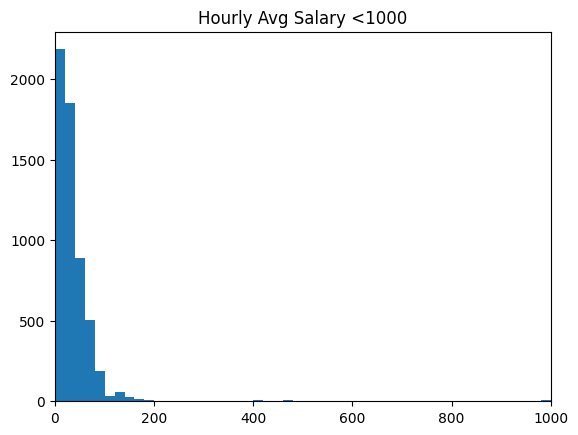

5800


In [ ]:
plt.hist(key_type_1_df[(key_type_1_df.average_salary_value <= 1000)].average_salary_value,bins=50)
plt.xlim(0,1000)
plt.title("Hourly Avg Salary <1000")
plt.show()
print(len(key_type_1_df[(key_type_1_df.average_salary_value <= 1000)]))

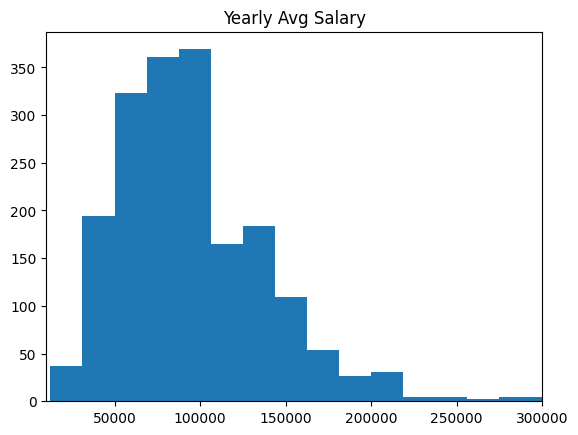

1879


In [ ]:
plt.hist(key_type_1_df[(key_type_1_df.average_salary_value >= 10000)].average_salary_value,bins=50)
plt.xlim(10000,300000)
plt.title("Yearly Avg Salary")
plt.show()
print(len(key_type_1_df[(key_type_1_df.average_salary_value >= 10000)]))

In [ ]:
# combined_df.salary.value_counts().head(20)

In [ ]:
#df with j[@context, @type, currency, value]  keys
key_type_2_df = combined_df[combined_df.salary.notnull()]
# eval string into dictionary for salary column, then exclude rows that do not have the desired keys
key_type_2_df['salary_keys'] = key_type_2_df.salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))
key_type_2_df = key_type_2_df[key_type_2_df['salary_keys'].apply(lambda x: 'value' in x and 'text' not in x)]
print(key_type_2_df.salary_keys.value_counts())


#only include rows with a appropriate key
def filter_for_single_key(df,key):
  df = df[df['salary_keys'].apply(lambda x: key in x)]

def filter_for_keys(df,keys):
  df = df[df['salary_keys'].apply(lambda x: x == keys)]
  return df

# key_type_2_df = filter_for_keys(key_type_2_df,['@context', '@type', 'currency', 'value'])


# regex to find pattern "ANY NUMBERS  (USD"
# value identifying function
def extract_min_max_unit_from_row(input_value):
  if type(input_value) == str:
    if input_value[0] == '{':
      input_value = eval(input_value)

      inner_value = input_value.get('value')

      if type(inner_value) == dict:
        min_value = inner_value.get('minValue')
        max_value = inner_value.get('maxValue')
        time_value = inner_value.get('unitText')
        return [min_value,max_value,time_value]

      else:
        return [None,None,None]
    else:
      return [None,None,None]
  else:
    return [None,None,None]


def extract_min_max_unit(df):
  df['min_salary'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[0])
  df['max_salary'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[1])
  df['time_unit'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[2])
  return df



key_type_2_df = extract_min_max_unit(key_type_2_df)
key_type_2_df['max_salary'] = key_type_2_df.max_salary.astype(float)
key_type_2_df['min_salary'] = key_type_2_df.min_salary.astype(float)
key_type_2_df['average_salary_value'] = key_type_2_df[['max_salary','min_salary']].mean(axis=1)
key_type_2_df['average_salary_value'] = key_type_2_df.average_salary_value.apply(lambda x: None if x == 0 else x)





def parse_salary_value(salary_value):
  salary_text = eval(salary_value).get('text')
  if re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_text) != []:
    return re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_text)
  elif re.findall('[0-9]+,[0-9]{3}',salary_text) != []:
    return re.findall('[0-9]+,[0-9]{3}',salary_text)
  elif re.findall('[0-9]+\.[0-9]+',salary_text) != []:
    return re.findall('[0-9]+\.[0-9]+',salary_text)
  else:
    return re.findall('[0-9]+',salary_text)




# # key_type_2_df['text_salary_values'] = key_type_2_df.salary.apply(lambda x: re.findall('[0-9]+',eval(x).get('text')))

# key_type_2_df['text_salary_values'] = key_type_2_df.salary.apply(lambda x: parse_salary_value(x))


# # convert to float and average
# def calc_avg_value(x):
#   x_length = len([float(n.replace(',','')) for n in x])
#   x_sum = sum([float(n.replace(',','')) for n in x])
#   if x_length > 0 and x_sum > 0:
#     return x_sum/x_length
#   else:
#     return None

# key_type_2_df['average_salary_value'] = key_type_2_df.text_salary_values.apply(lambda x: calc_avg_value(x))
# print(key_type_2_df.text_salary_values.apply(lambda x: len(x)).value_counts())


# # regex to find any HOUR, YEAR, MONTH

# def extract_period(x):
#   extracted_text = re.findall('HOUR|MONTH|YEAR',eval(x).get('text'))
#   if len(extracted_text)>0:
#     return extracted_text[0] # temp indexing until single period verified
#   else:
#     return None

# key_type_2_df['text_salary_period'] = key_type_2_df.salary.apply(lambda x: extract_period(x))



# # check how many not null from this operation vs how many remaining (null)
# # print(len(key_type_2_df[(key_type_2_df.text_salary_values.apply(lambda x: x != []) & key_type_2_df.text_salary_period.apply(lambda x: x != []))]))


# # troubleshooting prints
# print(key_type_2_df[(key_type_2_df.average_salary_value <= 50)].head(20))
# print("")
# print("Non-Null Average Salary Values:", sum(key_type_2_df.average_salary_value.notnull()))


# Will need some logic to convert "HOUR" time periods to "YEAR" if value is over a certain amount

<ipython-input-21-b8fcc12d2077>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_type_2_df['salary_keys'] = key_type_2_df.salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))


[@context, @type, currency, value]    7102
[@type, currency, value]              5666
[currency, value, @type]              2231
[@type, value]                         888
[value, @type]                         248
[@context, @type, value]               111
[@context, @type, value, currency]      16
Name: salary_keys, dtype: int64


In [ ]:
# testing key_type_2_df dictionary contents
# the "@context key" is useless
# the "@type" key always has value of "MonetaryAmount"
# the "currency" key has values: EUR x 6739, USD x 329, GBP x 31, CZK x 1, 35-42 KE x 1, and 85000 x 1
# the "value" key has value of a dictionary (but 4235 are just: {'@context': 'http://schema.org', '@type': 'QuantitativeValue', 'unitText': 'YEAR'})

print(key_type_2_df.head(5))
print('')
print(key_type_2_df.average_salary_value.describe())
print("")
print(key_type_2_df.salary.apply(lambda x: eval(x)).apply(lambda x: x['value']).value_counts().head())


                                                       title  \
2  Fund Accounting Manager: develop the Luxembourgish entity   
3                                      Compliance Supervisor   
4          Accountant ǀ FR/EN/ESP ǀ Luxembourg train station   
5                                    Corporate Manager - PSF   
6                                      SAP BODS - Consulting   

                                                                                                                                                                                                                                                                                                                                                                                                              text  \
2  We are very glad to let you know about the new job opportunity at one of our partners! This service provider has recently been created abroad and arrived in Luxembourg a few months ago. Today they are hirin

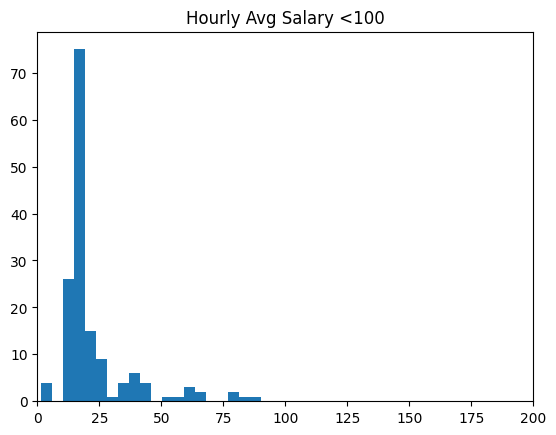

155


In [ ]:
plt.hist(key_type_2_df[(key_type_2_df.average_salary_value <= 100)].average_salary_value,bins=20)
plt.xlim(0,200)
plt.title("Hourly Avg Salary <100")
plt.show()
print(len(key_type_2_df[(key_type_2_df.average_salary_value <= 100)]))

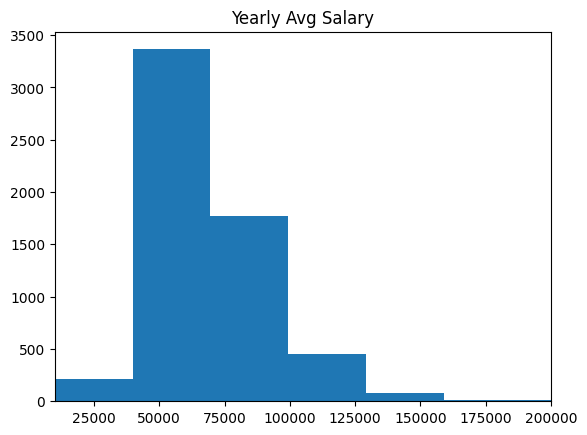

5944


In [ ]:
plt.hist(key_type_2_df[(key_type_2_df.average_salary_value >= 10000)].average_salary_value,bins=50)
plt.xlim(10000,200000)
plt.title("Yearly Avg Salary")
plt.show()
print(len(key_type_2_df[(key_type_2_df.average_salary_value >= 10000)]))

In [ ]:
#df with j[@context, @type, currency, value]  keys
key_type_3_df = combined_df[combined_df.salary.notnull()]
# eval string into dictionary for salary column, then exclude rows that do not have the desired keys
key_type_3_df['salary_keys'] = key_type_3_df.salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))
key_type_3_df = filter_for_keys(key_type_3_df,['@context', '@type', 'currency'])
print(key_type_3_df.salary_keys.value_counts())


#only include rows with a appropriate key
def filter_for_single_key(df,key):
  df = df[df['salary_keys'].apply(lambda x: key in x)]

def filter_for_keys(df,keys):
  df = df[df['salary_keys'].apply(lambda x: x == keys)]
  return df

# key_type_3_df = filter_for_keys(key_type_3_df,['@context', '@type', 'currency'])


# extract min, max, timeunit values from value dictionaries
def extract_min_max_unit_from_row(input_value):
  if type(input_value) == str:
    if input_value[0] == '{':
      input_value = eval(input_value)

      inner_value = input_value.get('value')

      if type(inner_value) == dict:
        min_value = inner_value.get('minValue')
        max_value = inner_value.get('maxValue')
        time_value = inner_value.get('unitText')
        return [min_value,max_value,time_value]

      else:
        return [None,None,None]
    else:
      return [None,None,None]
  else:
    return [None,None,None]


# extract min, max, timeunit values from rows with value dictionaries
def extract_min_max_unit(df):
  df['min_salary'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[0])
  df['max_salary'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[1])
  df['time_unit'] = df.salary.apply(lambda x: extract_min_max_unit_from_row(x)[2])
  return df



# key_type_3_df = extract_min_max_unit(key_type_3_df)
# key_type_3_df['max_salary'] = key_type_3_df.max_salary.astype(float)
# key_type_3_df['min_salary'] = key_type_3_df.min_salary.astype(float)
# key_type_3_df['average_salary_value'] = key_type_3_df[['max_salary','min_salary']].mean(axis=1)
# key_type_3_df['average_salary_value'] = key_type_3_df.average_salary_value.apply(lambda x: None if x == 0 else x)





def parse_salary_value(salary_value):
  salary_text = eval(salary_value).get('text')
  if re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_text) != []:
    return re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_text)
  elif re.findall('[0-9]+,[0-9]{3}',salary_text) != []:
    return re.findall('[0-9]+,[0-9]{3}',salary_text)
  elif re.findall('[0-9]+\.[0-9]+',salary_text) != []:
    return re.findall('[0-9]+\.[0-9]+',salary_text)
  else:
    return re.findall('[0-9]+',salary_text)




# # key_type_3_df['text_salary_values'] = key_type_3_df.salary.apply(lambda x: re.findall('[0-9]+',eval(x).get('text')))

# key_type_3_df['text_salary_values'] = key_type_3_df.salary.apply(lambda x: parse_salary_value(x))


# # convert to float and average
# def calc_avg_value(x):
#   x_length = len([float(n.replace(',','')) for n in x])
#   x_sum = sum([float(n.replace(',','')) for n in x])
#   if x_length > 0 and x_sum > 0:
#     return x_sum/x_length
#   else:
#     return None

# key_type_3_df['average_salary_value'] = key_type_3_df.text_salary_values.apply(lambda x: calc_avg_value(x))
# print(key_type_3_df.text_salary_values.apply(lambda x: len(x)).value_counts())


# # regex to find any HOUR, YEAR, MONTH

# def extract_period(x):
#   extracted_text = re.findall('HOUR|MONTH|YEAR',eval(x).get('text'))
#   if len(extracted_text)>0:
#     return extracted_text[0] # temp indexing until single period verified
#   else:
#     return None

# key_type_3_df['text_salary_period'] = key_type_3_df.salary.apply(lambda x: extract_period(x))



# # check how many not null from this operation vs how many remaining (null)
# # print(len(key_type_3_df[(key_type_3_df.text_salary_values.apply(lambda x: x != []) & key_type_3_df.text_salary_period.apply(lambda x: x != []))]))


# # troubleshooting prints
# print(key_type_3_df[(key_type_3_df.average_salary_value <= 50)].head(20))
# print("")
# print("Non-Null Average Salary Values:", sum(key_type_3_df.average_salary_value.notnull()))


# Will need some logic to convert "HOUR" time periods to "YEAR" if value is over a certain amount

[@context, @type, currency]    1732
Name: salary_keys, dtype: int64


<ipython-input-30-a3515ebf17e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_type_3_df['salary_keys'] = key_type_3_df.salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))


In [ ]:
key_type_3_df.head(10)

,title,text,level,salary,salary_keys
68,Customer Support French & English speaking based in Luxembourg,"We believe that in a digital era, mobile payments should be the norm. Customers are a core piece of the puzzle at Payconiq and this places the Support Team in the center of the organization. This role is a challenging and rewarding key position in an international FinTech company with around 40 nationalities within the around 110 staff members!Payconiq is looking for a spirited, fulltime Custo...",NaN,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
72,Senior Securities Officer Private Banking,"This is a great opportunity to join the operations department of a stable and successful private bank based in Luxembourg.You will be joining a dynamic team of 15 dedicated to the management of the centralised securities for Luxembourg and the headquarter of the bank.Your responsibilities* Monitor the operations on the various markets, interacting with the brokers and internal counterparties* ...",Masters Degree,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
75,JUNIOR SALES,"Blackridge Group Luxembourg is looking for a junior sales for one of its clients.We are looking for a competitive profile that thrives in a rapidly changing environment.If you are comfortable making dozens of calls a day, working with partners, generating interest, qualifying leads, and closing sales, then this role is for you! Responsibilities:Identify and develop business opportunities;Sourc...",JUNIOR,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
86,Key Account Manager,"People are at the core of our business and we believe everyone has a chance to be part of the future of work. At Badenoch + Clark, we believe in talent, not labels, and embrace diversity and promote more inclusive employment to our clients and partners. The Key Account Manager will negociate sales agreements and will fidelise existing partners (wholesale, Food, Petrol stations...).if you want ...",Masters Degree,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
92,Warehouse Manager (m/w/d),"We are looking for: Warehouse Manager (m/w/d) in HerbornOn behalf of our renowned client we are looking for a Warehouse Manager (m/f/d).The position will be filled by direct recruitment and permanent employment.Our client is a reputed industrial company with technically demanding componentsYour tasksOverseeing receiving, warehousing and distribution operationsImplementing operational policies ...",NaN,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
96,Business Analyst - CDD,"We offer our employees a working environment adapted to the evolution of the business lines; this translates in two key words: remote working & agility (depending on the department).Our unique geographical location in the heart of the City Centre and close to the Luxembourg City train station allows our employees to benefit from the advantages of a European capital.""Building together, with our...",Bachelors Degree,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
100,Recruitment Consultant in Luxembourg,"Be part on an international group and evolve among the most valuable experts Family environement implies flexibility and recognition within the companyClient DetailsAt PageGroup, we have five values that have always contributed to our success; take pride, be passionate, never give up, work as a team and make it fun. Our values are reflected in everything we do, it's what sets us apart.Our emph...",Bachelors Degree,"{'@context': 'http://schema.org', '@type': 'MonetaryAmount', 'currency': 'EUR'}","[@context, @type, currency]"
110,IT SAP SD/MM Functional Support (h/

1. Bucket Levels
  Entry Level: No Experience
  Junior: 2 or less
  Mid: 3-7
  Senior: 8+
  Executive: Explicit
  Student/Intern:

2. Pull salaries out of salary data
  Make hourly into full time annual equivalent
  Make monthly/weekly into annual equivalent
  Need two columns: number itself, and what time period
  make assumption that salary is middle of the range
  currency column

3. Experiment with different salary buckets

4. Need to pull out additional info: industry, location (country?), function

Concern:
Description and title might include info about labels
Could we use another NLP technique to strip this info out prior to training our larger model? We don't wan't our model to rely too much on the data existing, and not generalize well to descriptions that don't include it.

In [ ]:
# import numpy as np
# import pandas as pd
# from google.colab import drive

# drive.mount('/content/drive)

# # I dropped the data into my own google drive
# # Couldn't find the shared location accessible with my own drive mounted
# lux_data = pd.read_csv(r'/content/drive/MyDrive/lu_data_job_titles.csv',header=None)
# us_data = pd.read_csv(r'/content/drive/MyDrive/sample_data_job_titles.csv',header=None)
# combined_df = pd.concat([us_data,lux_data], axis=0)
# column_names = ['title','text','level','salary']
# combined_df.columns=column_names